In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

# load data
conn = sqlite3.connect('./Data/database.sqlite')
with sqlite3.connect('./Data/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player", con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)

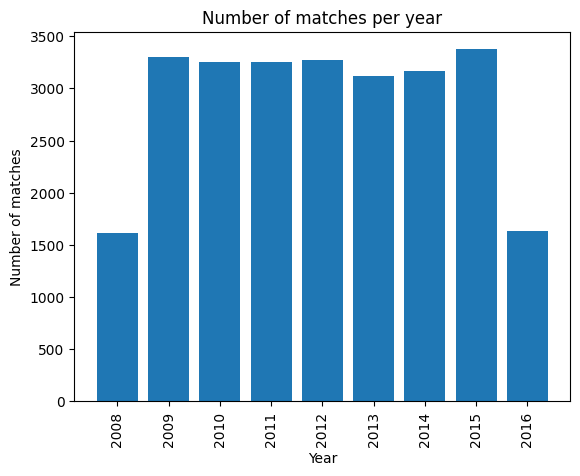

In [4]:
# plot number of matches per year
matches['year'] = matches['date'].str[:4]
matches_per_year = matches.groupby('year').count()

plt.bar(matches_per_year.index, matches_per_year['id'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of matches')
plt.title('Number of matches per year')
plt.show()

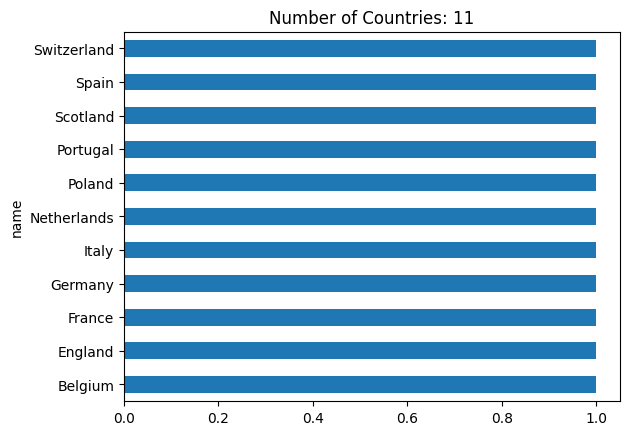

In [8]:
# plot number of countries
# Count the unique values in the 'countries' column
country_counts = countries['name'].value_counts()

# Plot the counts
country_counts.plot(kind='barh', rot=0)
plt.title('Number of Countries: ' + str(len(country_counts)))
plt.show()


In [10]:
leagues["country"] = leagues["country_id"].map(countries.set_index("id")["name"])
leagues

,id,country_id,name,country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [13]:
teams.head()
print(teams["team_long_name"].value_counts())

team_long_name
Widzew Łódź                     2
Royal Excel Mouscron            2
Polonia Bytom                   2
Korona Kielce                   1
Termalica Bruk-Bet Nieciecza    1
                               ..
VfL Wolfsburg                   1
Hannover 96                     1
FC Schalke 04                   1
Borussia Dortmund               1
Lugano                          1
Name: count, Length: 296, dtype: int64


In [3]:
matches["country_name"] = matches["country_id"].map(countries.set_index("id")["name"])
matches["league_name"] = matches["league_id"].map(leagues.set_index("id")["name"])
matches["home_team"] = matches["home_team_api_id"].map(teams.set_index("team_api_id")["team_long_name"])
matches["away_team"] = matches["away_team_api_id"].map(teams.set_index("team_api_id")["team_long_name"])

matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,country_name,league_name,home_team,away_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège


In [6]:
# plot match columns attributes
matches.describe()


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [10]:
# plot matches columns names
matches.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'country_name', 'league_name',
       'home_team', 'away_team'],
      dtype='object', length=119)

We will now select relevant countries and relevants fields for our analysis

In [3]:
# select relevant countries and merge with leagues

selected_countries = ['England','France','Germany','Italy','Spain']

countries = countries[countries.name.isin(selected_countries)]

leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
leagues.head()

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,4769,France,4769,France Ligue 1
2,7809,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,10257,Italy Serie A
4,21518,Spain,21518,Spain LIGA BBVA


In [4]:
matches_columns = matches.columns.tolist()
print(matches_columns)

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [5]:
matches = matches[matches.league_id.isin(leagues.id)]

In [ ]:
matches["winner"] = np.where(matches["home_team_goal"] > matches["away_team_goal"], 1, np.where(matches["home_team_goal"] < matches["away_team_goal"], 2, 0))

In [9]:
# drop unnecessary columns
columns_to_drop = ['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
matches = matches.drop(columns_to_drop, axis=1)

In [10]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1.91,3.4,4.33


In [11]:
random_match = matches.sample(1)
random_match


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A
24267,24268,21518,21518,2015/2016,18,2016-01-03 00:00:00,2030253,8370,8560,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><stats...,2.63,3.3,2.75


In [19]:
for col in random_match.columns:
    print(col)
    print(random_match[col].values)
    print("data type: ", random_match[col].dtype)


id
[24268]
data type:  int64
country_id
[21518]
data type:  int64
league_id
[21518]
data type:  int64
season
['2015/2016']
data type:  object
stage
[18]
data type:  int64
date
['2016-01-03 00:00:00']
data type:  object
match_api_id
[2030253]
data type:  int64
home_team_api_id
[8370]
data type:  int64
away_team_api_id
[8560]
data type:  int64
home_team_goal
[2]
data type:  int64
away_team_goal
[2]
data type:  int64
home_player_X1
[1.]
data type:  float64
home_player_X2
[2.]
data type:  float64
home_player_X3
[4.]
data type:  float64
home_player_X4
[6.]
data type:  float64
home_player_X5
[8.]
data type:  float64
home_player_X6
[4.]
data type:  float64
home_player_X7
[6.]
data type:  float64
home_player_X8
[3.]
data type:  float64
home_player_X9
[5.]
data type:  float64
home_player_X10
[7.]
data type:  float64
home_player_X11
[5.]
data type:  float64
away_player_X1
[1.]
data type:  float64
away_player_X2
[2.]
data type:  float64
away_player_X3
[4.]
data type:  float64
away_player_X4
[6.]
